In [1]:
import numpy as np
import requests
import scipy.io.wavfile as wavfile
import io
from IPython.display import Audio
from IPython.core.display import HTML
import matplotlib.pyplot as plt

In [2]:
def disp_audio(clip, rate):
    display(HTML(Audio(data = clip, rate = rate)._repr_html_()))

## Create a Sine wave with non-integer frequency

In [3]:
rate = 44100
L = 44100

# D4 note frequency
freq = 293.6648

n = np.arange(L)
x = np.sin(2.0 * np.pi * n * freq / L)

print("Sine Wave D4 note:")
disp_audio(x, rate)

Sine Wave D4 note:


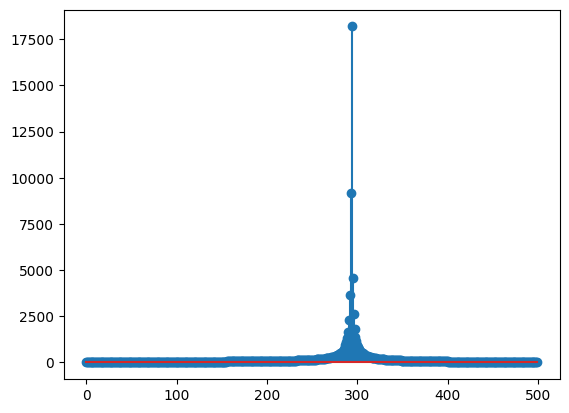

In [4]:
X = np.fft.rfft(x)

plt.stem(np.abs(X[0:500]))
plt.show()

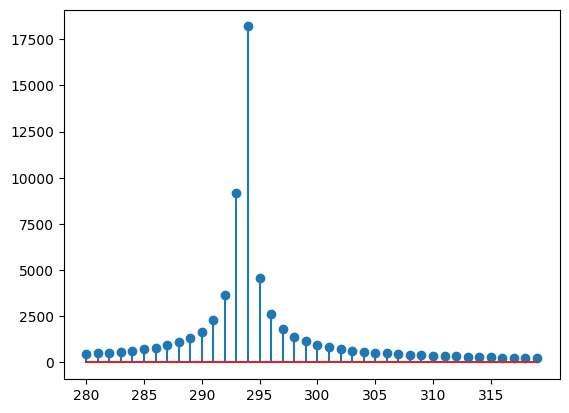

In [5]:
plt.stem(np.abs(X[280:320]))
plt.xticks(ticks = np.arange(0, 40, 5), labels = np.arange(280, 320, 5))
plt.show()

## Function for naive frequency scaling

In [6]:
def double_freq(x):
    X = np.fft.rfft(x)
    
    L = np.size(X)
    m = np.arange(L // 2)

    X2 = np.zeros_like(X)
    X2[2 * m] = X[m]
    
    return np.fft.irfft(X2)

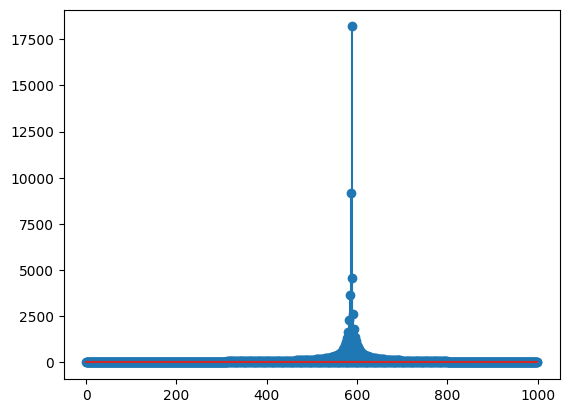

In [7]:
x2 = double_freq(x)
X2 = np.fft.rfft(x2)
plt.stem(np.abs(X2[0:1000]))
plt.show()

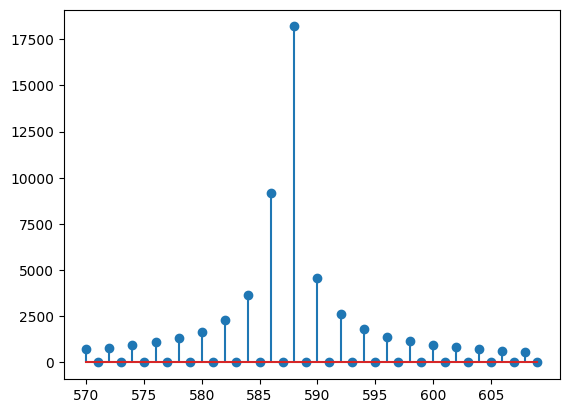

In [8]:
plt.stem(np.abs(X2[570:610]))
plt.xticks(ticks = np.arange(0, 40, 5), labels = np.arange(570, 610, 5))
plt.show()

In [9]:
disp_audio(x2, rate)

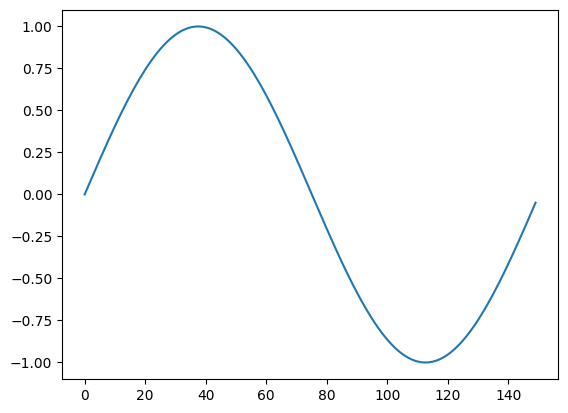

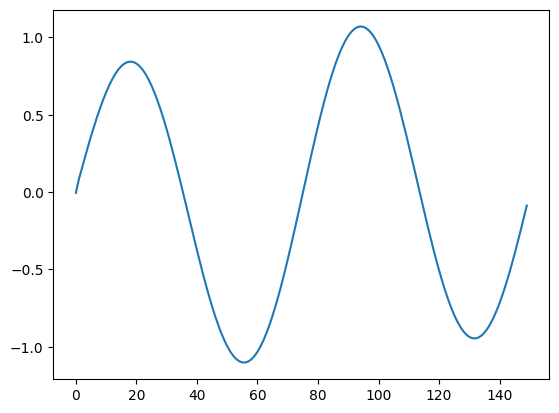

In [15]:
period = int(rate // freq)

plt.plot(x[0:period])
plt.show()

plt.plot(x2[0:period])
plt.show()

## Midpoint "hiccup"

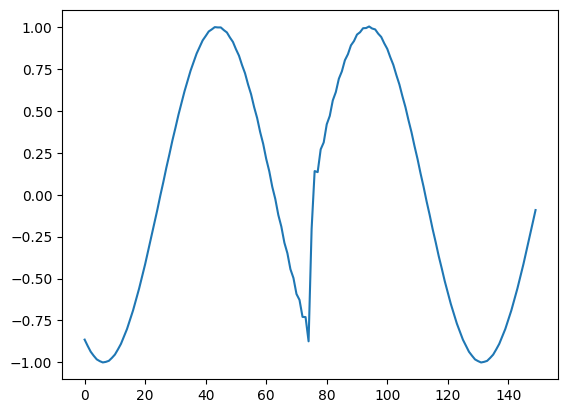

In [11]:
plt.plot(x2[(L//2 - period//2):(L//2 + period//2)])
plt.show()

## Multiple frequencies example

In [12]:
freq = 293.6648
x = np.sin(2.0 * np.pi * n * freq / rate)

freq = 369.9944
x = np.concatenate((x, np.sin(2.0 * np.pi * n * freq / rate)))

freq = 440
x = np.concatenate((x, np.sin(2.0 * np.pi * n * freq / rate)))

disp_audio(x, rate)

In [13]:
x2 = double_freq(x)

disp_audio(x2, rate)

## Frequency shifting

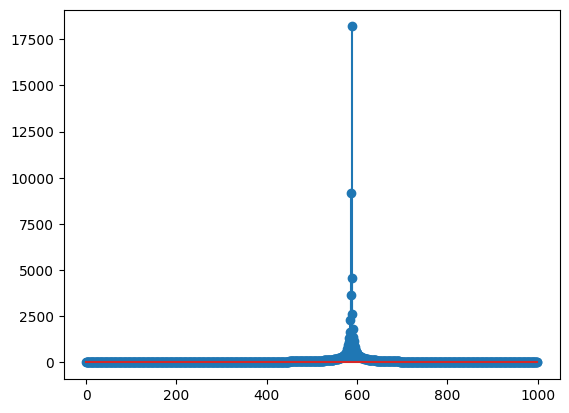

In [14]:
freq = 293.6648
x = np.sin(2.0 * np.pi * n * freq / rate)

X = np.fft.rfft(x)
X2 = np.zeros_like(X)
m = np.arange(np.size(X) - 294)
X2[m + 294] = X[m]

plt.stem(np.abs(X2[0:1000]))
plt.show()

x2 = np.fft.irfft(X2)
disp_audio(x2, rate)